In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import timeit
import time

1\. Write a function that converts number representation (bin<->dec<->hex)

### binary <-> decimal functions

In [2]:
def binaryToDecimal(binary):
    # Input is a binary number as a string and output is the decimal representation, dec
    dec = 0
    for i in range(1, len(binary)):
        dec += int(binary[i])*(2**((len(binary)-1) - i))
    dec *= (-1)**int(binary[0]) # leading number is the sign
    return dec

def testBinaryToDecimal():
    assert(binaryToDecimal('0') == 0)
    assert(binaryToDecimal('0101') == 5)
    assert(binaryToDecimal('01011000') == 88)
    assert(binaryToDecimal('11011000') == -88)
    assert(binaryToDecimal('010100011001') == 1305)
    assert(binaryToDecimal('110100011001') == -1305)
    print('Test for binaryToDecimal passed!')

def decimalToBinary(decimal):
    # Input a decimal number as an int and output the number in binary repsrentation as a string, bin
    bin = ''
    
    #now take care of sign and zero case
    if(decimal == 0): return '0'
    elif(decimal//(abs(decimal)) == 1): sign = '0'
    else: sign = '1'
    
    decimal = abs(decimal) #now that sign is taken care of, take absolute value for the for loop
    possible = ['0', '1']
    
    while decimal != 0:
        index = decimal%2
        bin += possible[index]
        decimal //= 2
        
    #Now reverse order and add corresponding sign
    bin = sign + bin[::-1]
    return bin

def testDecimalToBinary():
    assert(decimalToBinary(0) == '0')
    assert(decimalToBinary(1) == '01')
    assert(decimalToBinary(-1) == '11')
    assert(decimalToBinary(10) == '01010')
    assert(decimalToBinary(88) == '01011000')
    assert(decimalToBinary(-88) == '11011000')
    assert(decimalToBinary(1305) == '010100011001')
    assert(decimalToBinary(-1305) == '110100011001')
    print('Test for decimalToBinary passed!')

# Test functions
testBinaryToDecimal()
testDecimalToBinary()

Test for binaryToDecimal passed!
Test for decimalToBinary passed!


### decimal <-> hexadecimal functions

In [3]:
def decimalToHex(decimal):
    #Takes a decimal int and returns a hexadecimal str
    hexa = ''
    possible = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f']
    
    #now take care of sign and zero case
    if(decimal == 0): return '0'
    elif(decimal//(abs(decimal)) == 1): sign = '0'
    else: sign = '1'
    decimal = abs(decimal)    
    
    while decimal != 0:
        index = decimal%16
        hexa += possible[index]
        decimal //= 16
    
    #now reverse the order and add the sign
    hexa = sign + hexa[::-1]
    return hexa

def testDecimalToHex():
    assert(decimalToHex(0) == '0')
    assert(decimalToHex(10) == '0a')
    assert(decimalToHex(540) == '021c')
    assert(decimalToHex(-540) == '121c')
    assert(decimalToHex(1326) == '052e')
    assert(decimalToHex(-1326) == '152e')
    print('Test for decimalToHex passed!')

def hexToDecimal(hexadecimal):
    #Takes in a hexadecimal string and returns a decimal int, dec
    dec = 0
    #Use a dictionary with corresponding int values to take care of alphanumeric values
    possible = {'0':'0', '1':'1', '2':'2', '3':'3', '4':'4', '5':'5', '6':'6', '7':'7', '8':'8', '9':'9', 
                    'a':'10', 'b':'11', 'c':'12', 'd':'13', 'e':'14', 'f':'15'}
    
    for i in range(1, len(hexadecimal)):
        dec += int(possible[hexadecimal[i]])*(16**((len(hexadecimal)-1) - i))
    dec *= (-1)**int(hexadecimal[0]) # leading number is the sign
    return dec

def testHexToDecimal():
    assert(hexToDecimal('0') == 0)
    assert(hexToDecimal('0a') == 10)
    assert(hexToDecimal('021c') == 540)
    assert(hexToDecimal('121c') == -540)
    assert(hexToDecimal('052e') == 1326)
    assert(hexToDecimal('152e') == -1326)
    print('Test for hexToDecimal passed!')

testDecimalToHex()
testHexToDecimal()

Test for decimalToHex passed!
Test for hexToDecimal passed!


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [17]:
class error(Exception):
    pass

def wordToFloat(inputNum):
    #inputNum = str(num)
    #First check if the input is actually 32 bits long
    if(len(inputNum) != 32): raise error('Input num is not 32 bits long')
    
    bias = 127
    sign = int(inputNum[-1])
    f = inputNum[0:23]
    exp = binaryToDecimal(inputNum[23:31]) #use previously defined function to convert to an int
    
    mantissa = 1
    for i in range(1, len(f)):
        mantissa += int(f[22-i]) * 2**(-i)
        
    
    
    result = (-1)**sign * mantissa * 2**(exp-bias)
    return result

def testWordToFloat():
    print(wordToFloat('00000000000000000000011111000000'))
    print(wordToFloat('00000000000000000000110100000011'))
    
testWordToFloat()

1.1127618452062264e-67
-5.142787784847508e-39


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [18]:
def overflow():
    num = 1.5
    while num != float('inf'):
        if(num*2 == float('inf')): break
        num *= 2
    return num
    
def underflow():
    num = 0.5
    while num != 0:
        if(num/2 == 0): break
        num /= 2
    return num
        
print('The overflow limit is:', overflow())
print('The underflow limit is:', underflow())

The overflow limit is: 1.348269851146737e+308
The underflow limit is: 5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [19]:
def precision():
    #Adds a small value epsilon to num2 until the value is too small to make num1 and num2 different and returns
    num1, num2 = 1, 1
    epsilon = 1e-3
    while(num1 != num2+epsilon):
        epsilon/=2
    return epsilon

print('The machine presicion is:', precision())
    

The machine presicion is: 5.684341886080802e-17


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [20]:
def quadraticSolverA(a, b, c):
    root1 = (-b + (b**2 - 4*a*c)**.5)/(2*a)
    root2 = (-b - (b**2 - 4*a*c)**.5)/(2*a)
    return (root1, root2)

def quadraticSolverB(a, b, c):
    root1 = (2*c)/(-b - (b**2 - 4*a*c)**.5)
    root2 = (2*c)/(-b + (b**2 - 4*a*c)**.5)
    return (root1, root2)

### 5a)

In [21]:
print('The roots for a=0.001, b=1000, and c=0.001 are:', quadraticSolverA(0.001, 1000, 0.001))

The roots for a=0.001, b=1000, and c=0.001 are: (-9.999894245993346e-07, -999999.999999)


### 5b)

In [22]:
print('The roots for a=0.001, b=1000, and c=0.001 are:', quadraticSolverB(0.001, 1000, 0.001))

The roots for a=0.001, b=1000, and c=0.001 are: (-1.000000000001e-06, -1000010.5755125057)


#### The different quadratic formula solver give different results because

### 5c)

In [23]:
def quadraticSolverC(a, b, c):
    #Uses the equations that avoid a loss of significant figures in both previous cases
    root1 = (-b + (b**2 - 4*a*c)**.5)/(2*a)
    root2 = (2*c)/(-b + (b**2 - 4*a*c)**.5)
    return (root1, root2)

print('The roots for a=0.001, b=1000, and c=0.001 are:', quadraticSolverC(0.001, 1000, 0.001))

The roots for a=0.001, b=1000, and c=0.001 are: (-9.999894245993346e-07, -1000010.5755125057)


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

### 6a)

In [24]:
def f(x):
    return x*(x-1)

def df(x, delta):
    #return derivative at point x with delta
    return (f(x+delta) - f(x))/delta

print('The derivative of f(1) with delta=1e-2 is:', df(1, 1e-2))

The derivative of f(1) with delta=1e-2 is: 1.010000000000001


#### The program returns a value of 1.010000000000001 and analytically the answer is just 1.01. 

### 6b)

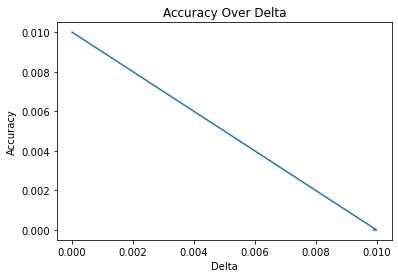

In [25]:
delta = 1e-2
deltas = []
accuracy = []
while delta > 1e-14:
    deltas.append(delta)
    accuracy.append(abs(df(1, delta) - 1.01))
    delta/=100

#plot results
plt.plot(accuracy, deltas)
plt.title('Accuracy Over Delta')
plt.xlabel('Delta')
plt.ylabel('Accuracy')
plt.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


### 7a)

In [2]:
trueI = np.pi/2
def semicircle(x):
    return 1-x**2
    
def riemann(N):
    h = 2/N
    xRange = np.linspace(-1, 1, N)
    I = 0
    for i in range(N):
        I += h*semicircle(xRange[i])
        
    return I

print(f'The Riemann sum of the semicircle with N=100 gives: {riemann(100)}, which has an error of {abs(trueI - riemann(100))/trueI}')


The Riemann sum of the semicircle with N=100 gives: 1.31986531986532, which has an error of 0.15974764051147497


In [9]:
%timeit riemann(20000)

28.4 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 7b)

In [ ]:
def timeRiemann(N, maxTime):
    #print(N)
    startTime = time.time()
    riemann(N)
    executionTime = time.time() - startTime
    
    if executionTime < maxTime:
        timeRiemann(N+1, maxTime)
    else:
        print(f'The maximum number of iterations of N is {N} to keep the program running under {maxTime}')
        return (N, executionTime)

print(timeRiemann(740000, 1.0)) #pick a time near 1s so program doesn't run forever

In [ ]:
#print(timeRiemann(10000000, 60.0))